# Exploratory Data Analysis

The Exploratory Data Analysis, contains the code to retrieve the Meta Kaggle dataset for this research. This file also develops the variables needed to run the other notebooks.

The connection with the Kaggle API is created, as stated in the Experimental Set-Up in the Thesis.

IMPORTS

In [1]:
import kaggle
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

import numpy as np
from datetime import datetime

Create Kaggle API connection

In [2]:
kaggle = kaggle.KaggleApi()
kaggle.authenticate()

In below code the dataset location on Kaggle is specified. If you want to get other files from any dataset, specify below in dataset_location. Where 'kaggle' is the name of the provider of the dataset and 'meta-kaggle' is the name of the dataset. 

With the dataset_view function a first glimpse of the dataset is revealed.

In [3]:
dataset_location = 'kaggle/meta-kaggle' #directory on Kaggle for dataset
meta_kaggle_dataset = kaggle.dataset_view(dataset_location)

With below function the files that are used in the thesis are downloaded.

In [4]:
kaggle.dataset_download_cli(dataset_location, file_name='Datasets.csv',unzip=True)
kaggle.dataset_download_cli(dataset_location, file_name='DatasetVersions.csv', unzip=True)
kaggle.dataset_download_cli(dataset_location, file_name='Users.csv', unzip=True)

Read files from the directory

In [5]:
kaggle_datasets_data = pd.read_csv('Datasets.csv')
kaggle_users_data = pd.read_csv('Users.csv')
kaggle_datasets_versions_data = pd.read_csv('DatasetVersions.csv')

Merge the files into a dataframe

In [6]:
kaggle_datasets_users_data = pd.merge(kaggle_datasets_data, kaggle_users_data, how='left', left_on=['CreatorUserId'],
                                      right_on=['Id'])
kaggle_datasets_versions_users_data = pd.merge(kaggle_datasets_users_data, kaggle_datasets_versions_data, how='left',
                                               left_on=['Id_x'], right_on=['DatasetId'])

Glimpse on the full dataset

In [8]:
kaggle_datasets_versions_users_data.tail()

,Id_x,CreatorUserId_x,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate_x,LastActivityDate,...,CreationDate_y,VersionNumber,Title,Slug,Subtitle,Description,VersionNotes,TotalCompressedBytes,TotalUncompressedBytes,Kaggle_Location
613036,2270044,5382272,5382272.0,NaN,3809034.0,3863761.0,2296548,2,06/15/2022 18:34:26,06/15/2022,...,06/15/2022 18:35:23,2.0,full_raw_dataset,full-raw-dataset,NaN,NaN,Data Update 2022/06/15,0.0,0.0,rahulshelke98/full-raw-dataset
613037,2270044,5382272,5382272.0,NaN,3809034.0,3863761.0,2296548,2,06/15/2022 18:34:26,06/15/2022,...,06/15/2022 18:42:25,3.0,full_raw_dataset,full-raw-dataset,NaN,NaN,Data Update 2022/06/15,0.0,0.0,rahulshelke98/full-raw-dataset
613038,2270048,8064850,8064850.0,NaN,3809014.0,3863741.0,2296553,2,06/15/2022 18:36:14,06/15/2022,...,06/15/2022 18:36:14,1.0,Ethereum Pricing (2020-2022),ethereum-pricing-20202022,Historical Data for Ethereum (2 years),Ethereum is a decentralized blockchain platfor...,Initial release,0.0,0.0,harshsingh2209/ethereum-pricing-20202022
613039,2270272,10165404,10165404.0,NaN,3809564.0,3864292.0,2296779,2,06/15/2022 21:16:42,06/15/2022,...,06/15/2022 21:16:42,1.0,Average IQ by Country,average-iq-by-country,NaN,Source: \nhttps://worldpopulationreview.com/co...,Initial release,0.0,0.0,weavrk/average-iq-by-country
613040,2270411,6210092,6210092.0,NaN,3809991.0,3864722.0,2296919,2,06/15/2022 23:41:07,06/15/2022,...,06/15/2022 23:41:07,1.0,uspppm-037-models,uspppm-037-models,NaN,NaN,Initial release,0.0,0.0,uplus26e7/uspppm-037-models


View the distribution of the Total Votes

<AxesSubplot:>

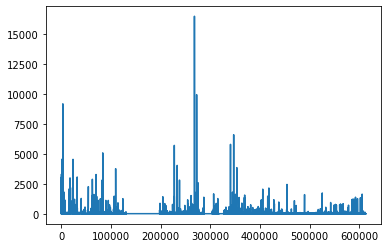

In [9]:
kaggle_datasets_versions_users_data['TotalVotes'].plot()

The maximum of votes for a dataset

In [10]:
kaggle_datasets_versions_users_data['TotalVotes'].max()

16514

Make the Date tables actual datetime values (where strings before) and convert to only date values as then they can be substracted.

In [11]:
kaggle_datasets_versions_users_data['LastActivityDate'] = kaggle_datasets_versions_users_data[
    'LastActivityDate'].astype('datetime64[ns]')
kaggle_datasets_versions_users_data['CreationDate'] = kaggle_datasets_versions_users_data['CreationDate_x'].astype(
    'datetime64[ns]')
kaggle_datasets_versions_users_data['LastActivityDate'] = kaggle_datasets_versions_users_data[
    'LastActivityDate'].dt.date
kaggle_datasets_versions_users_data['CreationDate'] = kaggle_datasets_versions_users_data['CreationDate'].dt.date

Retrieving the difference between last activity and creation date plus transform to only days value

In [12]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_CreationDate'] = kaggle_datasets_versions_users_data[
                                                                                'LastActivityDate'] - \
                                                                            kaggle_datasets_versions_users_data[
                                                                                'CreationDate']
kaggle_datasets_versions_users_data['Diff_LastActivityDate_CreationDate'] = kaggle_datasets_versions_users_data[
    'Diff_LastActivityDate_CreationDate'].dt.days

Checking what the highest amount of days is.

<AxesSubplot:>

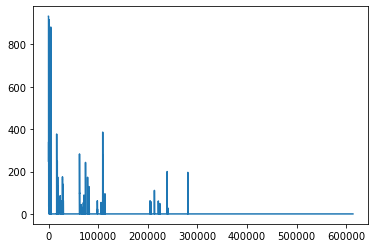

In [13]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_CreationDate'].plot()

In [17]:
kaggle_datasets_versions_users_data.head()

,Id_x,CreatorUserId_x,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate_x,LastActivityDate,...,Title,Slug,Subtitle,Description,VersionNotes,TotalCompressedBytes,TotalUncompressedBytes,Kaggle_Location,CreationDate,Diff_LastActivityDate_CreationDate
0,6,1,NaN,12.0,2158.0,2158.0,762,2,07/18/2015 00:51:12,2018-02-05,...,2013 American Community Survey,2013-american-community-survey,Find insights in the 2013 American Community S...,The [American Community Survey](http://www.cen...,Re-uploading the files so they appear in file ...,4.203827e+09,4.203827e+09,kaggleteam/2013-american-community-survey,2015-07-18,933
1,6,1,NaN,12.0,2158.0,2158.0,762,2,07/18/2015 00:51:12,2018-02-05,...,2013 American Community Survey,2013-american-community-survey,Find insights in the 2013 American Community S...,The [American Community Survey](http://www.cen...,Initial Release,NaN,NaN,kaggleteam/2013-american-community-survey,2015-07-18,933
2,23,514856,NaN,4.0,2151.0,2151.0,1035,2,01/28/2016 06:30:59,2018-02-06,...,World Development Indicators,world-development-indicators,Explore country development indicators from ar...,The World Development Indicators from the Worl...,Re-uploading the files so they appear in file ...,2.042308e+09,2.042308e+09,NaN,2016-01-28,740
3,23,514856,NaN,4.0,2151.0,2151.0,1035,2,01/28/2016 06:30:59,2018-02-06,...,World Development Indicators,world-development-indicators,Explore country development indicators from ar...,The World Development Indicators from the Worl...,Initial release,NaN,NaN,NaN,2016-01-28,740
4,24,993,993.0,NaN,792987.0,814776.0,1078,2,02/19/2016 06:37:00,2018-02-06,...,2016 US Election,2016-us-election,Explore data related to the 2016 US Election,This contains data relevant for the 2016 US Pr...,Initial release,NaN,NaN,benhamner/2016-us-election,2016-02-19,718


Create timestamp variable and develop new column for the difference between LastActivityDate and Today date.

In [20]:
todaydate = datetime.now().date()
print(todaydate)

2022-06-16


In [21]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_Today'] = todaydate - kaggle_datasets_versions_users_data[
    'LastActivityDate']

In [22]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_Today'] = kaggle_datasets_versions_users_data[
    'Diff_LastActivityDate_Today'].dt.days

In [23]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_Today']

0         1592
1         1592
2         1591
3         1591
4         1591
          ... 
613036       1
613037       1
613038       1
613039       1
613040       1
Name: Diff_LastActivityDate_Today, Length: 613041, dtype: int64

Checking which is the highest activity date.

<AxesSubplot:>

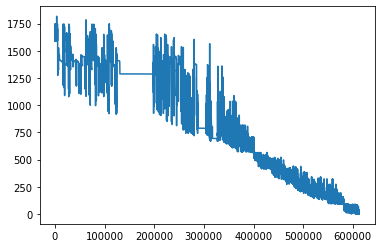

In [25]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_Today'].plot()

In [26]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_Today'].describe()

count    613041.000000
mean        851.316933
std         496.440946
min           1.000000
25%         389.000000
50%         804.000000
75%        1359.000000
max        1818.000000
Name: Diff_LastActivityDate_Today, dtype: float64

In [27]:
kaggle_datasets_versions_users_data['Diff_LastActivityDate_Today'].max()

1818

Developing the boolean values for the description, i.e., description yes (1), or no (0)

In [29]:
kaggle_datasets_versions_users_data.loc[
    kaggle_datasets_versions_users_data['Description'].isnull(), 'Bool_Description'] = 0
kaggle_datasets_versions_users_data.loc[
    kaggle_datasets_versions_users_data['Description'].notnull(), 'Bool_Description'] = 1

kaggle_datasets_versions_users_data['Bool_Description'] = kaggle_datasets_versions_users_data[
    'Bool_Description'].astype('int')

Developing the boolean values for the subtitle, i.e., description yes (1), or no (0)

In [31]:
kaggle_datasets_versions_users_data.loc[kaggle_datasets_versions_users_data['Subtitle'].isnull(), 'Bool_Subtitle'] = 0
kaggle_datasets_versions_users_data.loc[kaggle_datasets_versions_users_data['Subtitle'].notnull(), 'Bool_Subtitle'] = 1

kaggle_datasets_versions_users_data['Bool_Subtitle'] = kaggle_datasets_versions_users_data['Bool_Subtitle'].astype(
    'int')

In [32]:
kaggle_datasets_versions_users_data['Description'].describe()

count                                                311268
unique                                                50304
top       ### Context\n\nThe number of new cases is incr...
freq                                                  16165
Name: Description, dtype: object

Transforming the Description to String value for getting the length of the Description

In [33]:
kaggle_datasets_versions_users_data['Description'].astype('str')

0         The [American Community Survey](http://www.cen...
1         The [American Community Survey](http://www.cen...
2         The World Development Indicators from the Worl...
3         The World Development Indicators from the Worl...
4         This contains data relevant for the 2016 US Pr...
                                ...                        
613036                                                  nan
613037                                                  nan
613038    Ethereum is a decentralized blockchain platfor...
613039    Source: \nhttps://worldpopulationreview.com/co...
613040                                                  nan
Name: Description, Length: 613041, dtype: object

Setting the Null values to 0.

In [34]:
kaggle_datasets_versions_users_data.loc[kaggle_datasets_versions_users_data['Description'].isnull(), 'Description_Length'] = 0


Creating the Description_Length colum with as values the length of the description

In [36]:
kaggle_datasets_versions_users_data['Description_Length'] = kaggle_datasets_versions_users_data['Description'].str.len()

In [37]:
kaggle_datasets_versions_users_data['Description_Length']

0         3295.0
1         3295.0
2          964.0
3          964.0
4         2644.0
           ...  
613036       NaN
613037       NaN
613038     509.0
613039      81.0
613040       NaN
Name: Description_Length, Length: 613041, dtype: float64

In [38]:
kaggle_datasets_versions_users_data.loc[
    kaggle_datasets_versions_users_data['Description_Length'].isnull(), 'Description_Length'] = 0

In [39]:
kaggle_datasets_versions_users_data['Description_Length'] = kaggle_datasets_versions_users_data['Description_Length'].fillna(0).astype(int)

In [40]:
kaggle_datasets_versions_users_data['Description_Length'].describe()

count    613041.000000
mean        713.994079
std        1453.541463
min           0.000000
25%           0.000000
50%          98.000000
75%        1126.000000
max      365120.000000
Name: Description_Length, dtype: float64

In [42]:
count = (kaggle_datasets_versions_users_data['Description_Length'] ==0).sum()

In [43]:
count

301773

In [44]:
kaggle_datasets_versions_users_data['Description_Length'].notnull().sum()

613041

Check whichs types are in the dataset.

In [47]:
result = kaggle_datasets_versions_users_data.dtypes
print(result)

Id_x                                          int64
CreatorUserId_x                               int64
OwnerUserId                                 float64
OwnerOrganizationId                         float64
CurrentDatasetVersionId                     float64
CurrentDatasourceVersionId                  float64
ForumId                                       int64
Type                                          int64
CreationDate_x                               object
LastActivityDate                             object
TotalViews                                    int64
TotalDownloads                                int64
TotalVotes                                    int64
TotalKernels                                  int64
Id_y                                        float64
UserName                                     object
DisplayName                                  object
RegisterDate                                 object
PerformanceTier                             float64
Id          

Make NumPy printouts easier to read.

In [48]:
np.set_printoptions(precision=3, suppress=True)

Load the features that are going to be used into the kaggle_dataset variable

In [50]:
kaggle_dataset_all_features = kaggle_datasets_versions_users_data[
    ['Diff_LastActivityDate_CreationDate', 'Diff_LastActivityDate_Today', 'Description_Length', 'Bool_Description', 'Bool_Subtitle', 'TotalDownloads',
     'TotalViews', 'TotalVotes']].copy()

In [51]:
kaggle_dataset_without_usage_features = kaggle_datasets_versions_users_data[
    ['Diff_LastActivityDate_CreationDate', 
     'Diff_LastActivityDate_Today','Description_Length', 
     'Bool_Description', 'Bool_Subtitle', 'TotalVotes']].copy()

In [52]:
kaggle_dataset_all_features.dtypes

Diff_LastActivityDate_CreationDate    int64
Diff_LastActivityDate_Today           int64
Description_Length                    int64
Bool_Description                      int64
Bool_Subtitle                         int64
TotalDownloads                        int64
TotalViews                            int64
TotalVotes                            int64
dtype: object

In [53]:
kaggle_dataset_all_features.describe()

,Diff_LastActivityDate_CreationDate,Diff_LastActivityDate_Today,Description_Length,Bool_Description,Bool_Subtitle,TotalDownloads,TotalViews,TotalVotes
count,613041.000000,613041.000000,613041.000000,613041.000000,613041.000000,613041.000000,6.130410e+05,613041.000000
mean,4.598601,851.316933,713.994079,0.507744,0.582858,27530.648017,2.289739e+04,26.111624
std,50.182719,496.440946,1453.541463,0.499940,0.493087,74846.958366,1.064591e+05,212.628064
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,389.000000,0.000000,0.000000,0.000000,6.000000,4.390000e+02,0.000000
50%,0.000000,804.000000,98.000000,1.000000,1.000000,62.000000,2.587000e+03,2.000000
75%,0.000000,1359.000000,1126.000000,1.000000,1.000000,506.000000,9.737000e+03,18.000000
max,933.000000,1818.000000,365120.000000,1.000000,1.000000,418879.000000,9.254881e+06,16514.000000


In [54]:
kaggle_dataset_all_features.head()

,Diff_LastActivityDate_CreationDate,Diff_LastActivityDate_Today,Description_Length,Bool_Description,Bool_Subtitle,TotalDownloads,TotalViews,TotalVotes
0,933,1592,3295,1,1,5852,63999,96
1,933,1592,3295,1,1,5852,63999,96
2,740,1591,964,1,1,61721,400610,1600
3,740,1591,964,1,1,61721,400610,1600
4,718,1591,2644,1,1,25878,242349,518


In [55]:
print(kaggle_dataset_all_features['Diff_LastActivityDate_CreationDate'])
print(kaggle_dataset_all_features['Diff_LastActivityDate_Today'])

0         933
1         933
2         740
3         740
4         718
         ... 
613036      0
613037      0
613038      0
613039      0
613040      0
Name: Diff_LastActivityDate_CreationDate, Length: 613041, dtype: int64
0         1592
1         1592
2         1591
3         1591
4         1591
          ... 
613036       1
613037       1
613038       1
613039       1
613040       1
Name: Diff_LastActivityDate_Today, Length: 613041, dtype: int64


Histogram

In [57]:
#skewness and kurtosis
print("Skewness: %f" % kaggle_dataset_all_features['TotalVotes'].skew())
print("Kurtosis: %f" % kaggle_dataset_all_features['TotalVotes'].kurt())


Skewness: 30.520013
Kurtosis: 1262.344186


Splitting the dataset into a training set and a test set. The test set will be used in the final evaluation of models.

In [60]:
train_dataset = kaggle_dataset_all_features.sample(frac=0.8, random_state=0)
test_dataset = kaggle_dataset_all_features.drop(train_dataset.index)

In [61]:
train_dataset_without_usage = kaggle_dataset_without_usage_features.sample(frac=0.8, random_state=0)
test_dataset_without_usage = kaggle_dataset_without_usage_features.drop(train_dataset_without_usage.index)

Inspecting the data.

Reviewing the joint distribution of a few pairs of columns from the training set.

Also checking the overall statistics.

In [64]:
train_dataset.describe()

,Diff_LastActivityDate_CreationDate,Diff_LastActivityDate_Today,Description_Length,Bool_Description,Bool_Subtitle,TotalDownloads,TotalViews,TotalVotes
count,490433.000000,490433.000000,490433.000000,490433.000000,490433.000000,490433.000000,4.904330e+05,490433.000000
mean,4.572001,851.378716,713.189294,0.507519,0.582885,27596.152314,2.287714e+04,26.101321
std,50.013455,496.402082,1388.689480,0.499944,0.493083,74929.065592,1.065075e+05,211.430531
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,389.000000,0.000000,0.000000,0.000000,6.000000,4.390000e+02,0.000000
50%,0.000000,805.000000,95.000000,1.000000,1.000000,62.000000,2.589000e+03,2.000000
75%,0.000000,1359.000000,1125.000000,1.000000,1.000000,506.000000,9.737000e+03,18.000000
max,933.000000,1818.000000,227296.000000,1.000000,1.000000,418879.000000,9.254881e+06,16514.000000


See the different ranges of features

In [66]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Diff_LastActivityDate_CreationDate,4.572001,50.013455
Diff_LastActivityDate_Today,851.378716,496.402082
Description_Length,713.189294,1388.689480
Bool_Description,0.507519,0.499944
Bool_Subtitle,0.582885,0.493083
TotalDownloads,27596.152314,74929.065592
TotalViews,22877.136151,106507.531690
TotalVotes,26.101321,211.430531


Take a small part of the dataset to test first and see if the model runs

In [67]:
#train_dataset = train_dataset.sample(10000)
#test_dataset = test_dataset.sample(10000)

train_dataset.tail()
train_dataset_without_usage.tail()

,Diff_LastActivityDate_CreationDate,Diff_LastActivityDate_Today,Description_Length,Bool_Description,Bool_Subtitle,TotalVotes
318778,0,695,1450,1,1,19
529888,0,191,0,0,0,0
301724,0,789,1830,1,1,18
557825,0,195,896,1,1,12
307638,0,1372,858,1,1,0


Splitting features from labels

Separate the target value—the "label"—from the features.

This label is the value that the model will train to predict.

In [68]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('TotalVotes')
test_labels = test_features.pop('TotalVotes')

In [69]:
train_features_without_usage = train_dataset_without_usage.copy()
test_features_without_usage = test_dataset_without_usage.copy()

train_labels_without_usage = train_features_without_usage.pop('TotalVotes')
test_labels_without_usage = test_features_without_usage.pop('TotalVotes')

Initialize all the variables used in the other Notebooks.

In [70]:
%store kaggle_datasets_versions_users_data

Stored 'kaggle_datasets_versions_users_data' (DataFrame)


In [71]:
%store train_features
%store test_features

%store train_labels
%store test_labels

Stored 'train_features' (DataFrame)
Stored 'test_features' (DataFrame)
Stored 'train_labels' (Series)
Stored 'test_labels' (Series)


In [72]:
%store train_features_without_usage
%store test_features_without_usage

%store train_labels_without_usage
%store test_labels_without_usage

Stored 'train_features_without_usage' (DataFrame)
Stored 'test_features_without_usage' (DataFrame)
Stored 'train_labels_without_usage' (Series)
Stored 'test_labels_without_usage' (Series)
